# Case Study 1 : Data Mining in Financial Data

Name     :- Abhishek Babulal Gupta <br>

**Financial Data Collection:**
* Please collect five-year stock price data of at least 5 stocks. You can choose any stocks you'd like to analyze.
* You have multiple ways of collecting financial data with Python, here is a reference: https://www.alpharithms.com/python-financial-data-491110/
* Load the data you collect and start working on your idea.


# Problem: pick a data science problem that you plan to solve using Stock Price Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data available and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [ ]:
Predicting Stock Price Movement

Description:
The objective of this project is to predict the movement of stock prices for a selected set of companies (AAPL, MSFT, NKE, SBUX, and BA) using historical OHLCV (Open, High, Low, Close, Volume) data. The task is framed as a binary classification problem, where the goal is to build a model that forecasts whether the next day’s adjusted closing price will move Up or Down.

Importance and Interest:

1) Investment Decision Making: Accurate predictions can help investors and traders make better buy/sell decisions, minimize risks, and optimize returns.

2) Market Efficiency: Anticipating price movements provides insight into how efficiently financial markets incorporate available information.

3) Economic Indicators: Stock price behavior reflects the economic health of sectors and industries, making these predictions useful for policymakers and analysts.

4) Risk Management: Reliable forecasts can support portfolio adjustments to mitigate losses in volatile markets.

Purpose of the Problem:

1) Complex Patterns: Stock price movements are influenced by company fundamentals, economic indicators, and global events. Machine learning techniques can detect hidden patterns in this complex data.

2) Data Availability: Historical OHLCV data is easily accessible through APIs such as yfinance, making it straightforward to collect and analyze large datasets.

3) Dynamic Learning: Because markets change constantly, models can be updated with new data to adapt and improve predictions over time.

The code begins by downloading and processing historical stock data. Following this, the pipeline includes feature selection, model training, evaluation, and comparison of multiple classifiers to assess their predictive power on stock price movements.


# Data Collection/Processing:

In [55]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import yfinance as yf
import pandas as pd

# Define the list of five stock tickers
stock_names = ['AAPL', 'MSFT', 'NKE', 'SBUX', 'BA']

# Define the 5-year time period for which we want stock data
start_date = '2020-01-01'
end_date = '2025-01-01'

# Download historical data for each stock
data = yf.download(stock_names, start=start_date, end=end_date, auto_adjust=False)

# Convert the wide multi-index dataframe into a tidy format
final_stock_data = data.stack(level=1, future_stack=True).reset_index()

# Rename the column 'level_1' to 'Ticker' for clarity
final_stock_data.rename(columns={"level_1": "Ticker"}, inplace=True)

# Remove the redundant column name in the dataframe header
final_stock_data.columns.name = None

[*********************100%***********************]  5 of 5 completed


In [56]:
# Print the shape of the dataframe to know its size
print("Number of rows and columns are:")

# .shape returns a tuple (rows, columns)
rows_col = final_stock_data.shape
print(rows_col)

Number of rows and columns are:
(6290, 8)


In [57]:
# Print general information about the dataset
print("DataSet Information")

display(final_stock_data.info())

DataSet Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6290 non-null   datetime64[ns]
 1   Ticker     6290 non-null   object        
 2   Adj Close  6290 non-null   float64       
 3   Close      6290 non-null   float64       
 4   High       6290 non-null   float64       
 5   Low        6290 non-null   float64       
 6   Open       6290 non-null   float64       
 7   Volume     6290 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 393.3+ KB


None

In [58]:
#Summary stats for dataset
print("Summary Statistics:")
display(final_stock_data.describe())

Summary Statistics:


,Date,Adj Close,Close,High,Low,Open,Volume
count,6290,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,6.290000e+03
mean,2022-07-01 15:39:46.645468672,166.299784,170.649213,172.633392,168.641521,170.646655,2.973118e+07
min,2020-01-02 00:00:00,49.902039,56.092499,57.125000,50.020000,55.549999,1.821900e+06
25%,2021-04-01 00:00:00,98.239487,104.122501,105.209999,102.969999,104.037498,6.611975e+06
50%,2022-06-30 12:00:00,147.855484,150.434998,152.770004,148.184998,150.220001,1.257145e+07
75%,2023-10-02 00:00:00,210.710007,212.724998,215.237503,210.237503,212.969997,3.516498e+07
max,2024-12-31 00:00:00,463.240967,467.559998,468.350006,464.459991,467.000000,4.265100e+08
std,NaN,84.808646,84.520969,85.219451,83.762774,84.527990,4.034640e+07


In [59]:
#Check if any of the column in a dataset contains null or not
null_values = final_stock_data.isnull().sum()
print("Null values in the columns are: ")
print(null_values)

Null values in the columns are: 
Date         0
Ticker       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


# Data Exploration: Exploring the Dataset

**Plot the daily, weekly and monthly returns of a set of stocks of your choice**
* references:
    * https://www.investopedia.com/terms/y/yearly-rate-of-return-method.asp
    * https://www.fool.com/knowledge-center/how-to-calculate-a-monthly-return-on-investment/#:~:text=Take%20the%20ending%20balance%2C%20and,corresponds%20to%20your%20monthly%20return.
    * https://www.investopedia.com/terms/i/intraday-return.asp#:~:text=How%20Is%20Daily%20Return%20Calculated,price%2C%20then%20multiply%20by%20100.


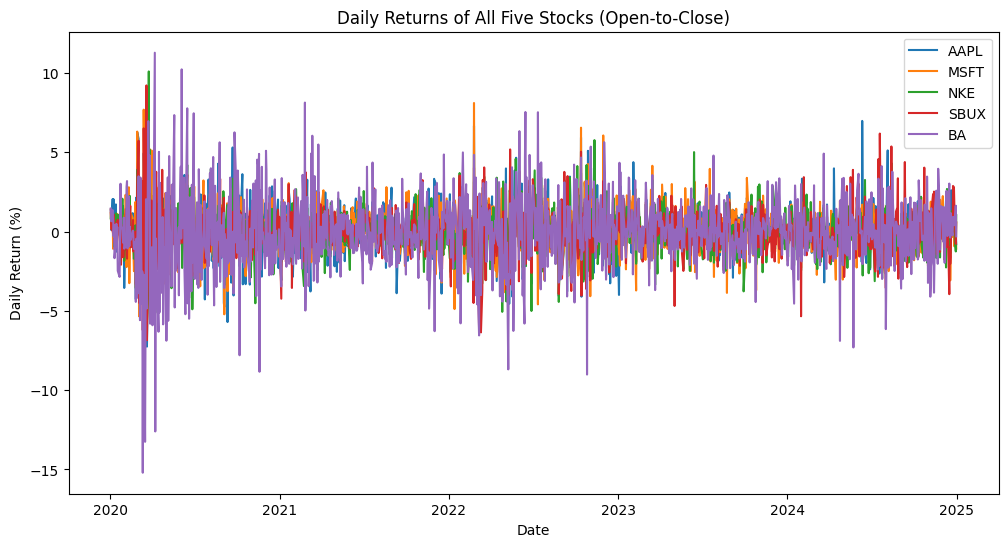

In [60]:
import matplotlib.pyplot as plt

# Daily Returns (Open-to-Close Method)
# Formula: (Close - Open) / Open * 100
final_stock_data['Daily_Return'] = (
    (final_stock_data['Close'] - final_stock_data['Open']) / final_stock_data['Open']
) * 100

# Plot Daily Returns
plt.figure(figsize=(12, 6))
for symbol in stock_names:
    subset = final_stock_data[final_stock_data['Ticker'] == symbol]
    plt.plot(subset['Date'], subset['Daily_Return'], label=symbol)

plt.title('Daily Returns of All Five Stocks (Open-to-Close)')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.show()

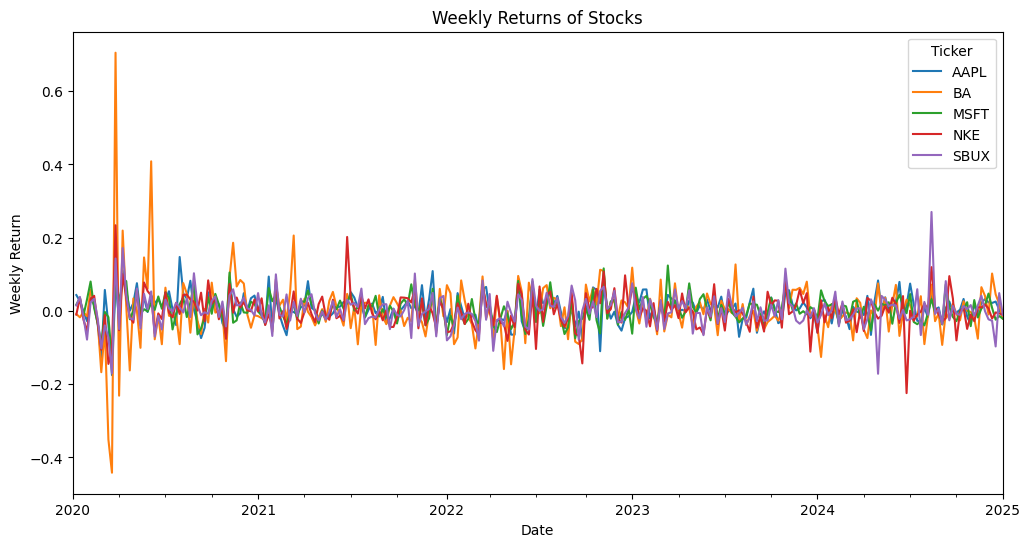

In [61]:
# Plotting weekly returns
weekly_returns = final_stock_data.pivot(index="Date", columns="Ticker", values="Adj Close")

# Resample to weekly (Friday close), forward-fill missing days, and compute percentage change
weekly_returns = weekly_returns.resample("W-FRI").ffill().pct_change()

weekly_returns.plot(figsize=(12, 6))
plt.title("Weekly Returns of Stocks")
plt.xlabel("Date")
plt.ylabel("Weekly Return")
plt.legend(title="Ticker")
plt.show()

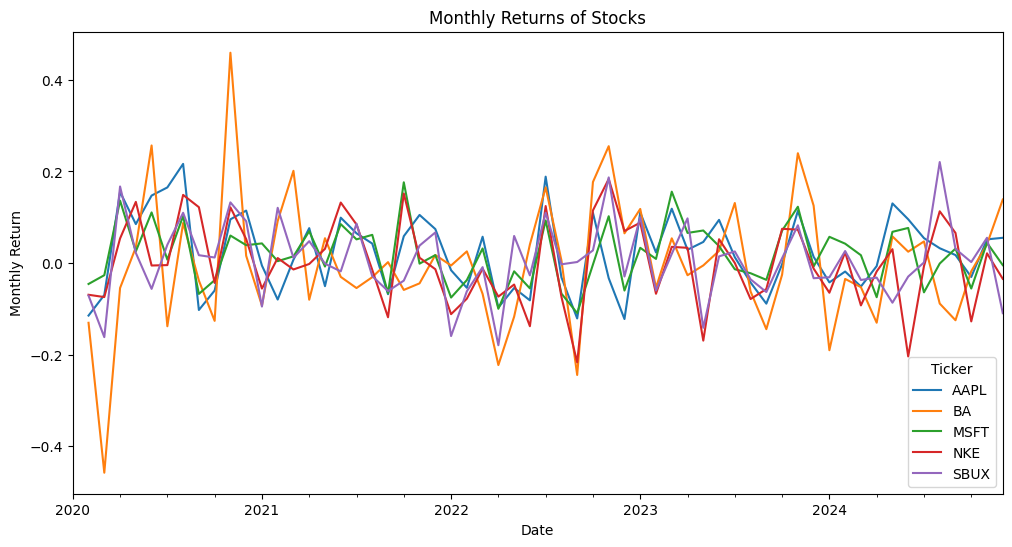

In [62]:
# Plotting Monthly returns
monthly_returns = final_stock_data.pivot(index="Date", columns="Ticker", values="Adj Close")

# Resample to month end (ME), forward-fill missing days, and compute percentage change
monthly_returns = monthly_returns.resample("ME").ffill().pct_change()

monthly_returns.plot(figsize=(12, 6))
plt.title("Monthly Returns of Stocks")
plt.xlabel("Date")
plt.ylabel("Monthly Return")
plt.legend(title="Ticker")
plt.show()

**Other data explorations you would like to present:**

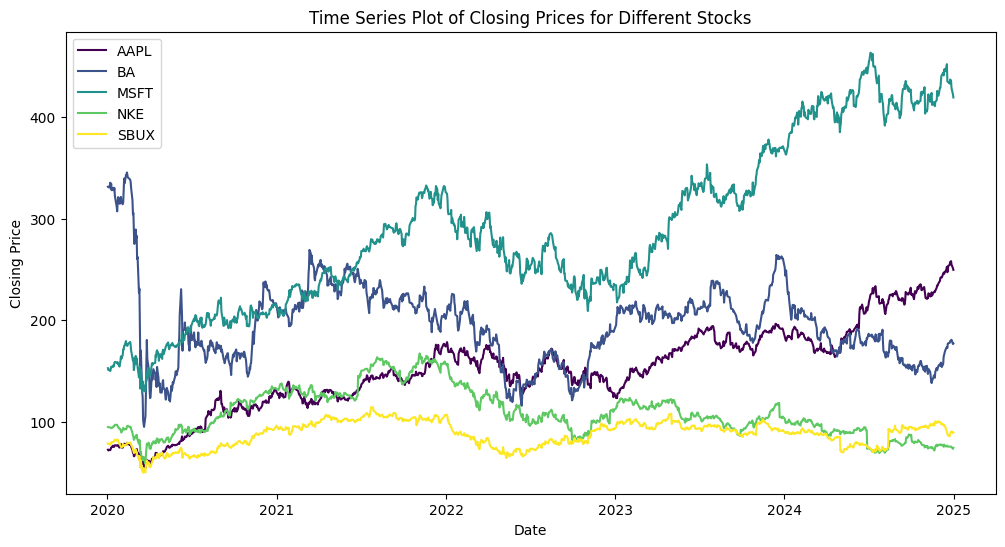

In [63]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import matplotlib.pyplot as plt
import numpy as np

# Get unique stock tickers
unique_symbols = final_stock_data['Ticker'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_symbols)))

# Plot each stock with a unique color
plt.figure(figsize=(12, 6))
for symbol, color in zip(unique_symbols, colors):
    stock_data = final_stock_data[final_stock_data['Ticker'] == symbol]
    plt.plot(stock_data['Date'], stock_data['Adj Close'], label=symbol, color=color)

plt.title('Time Series Plot of Closing Prices for Different Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

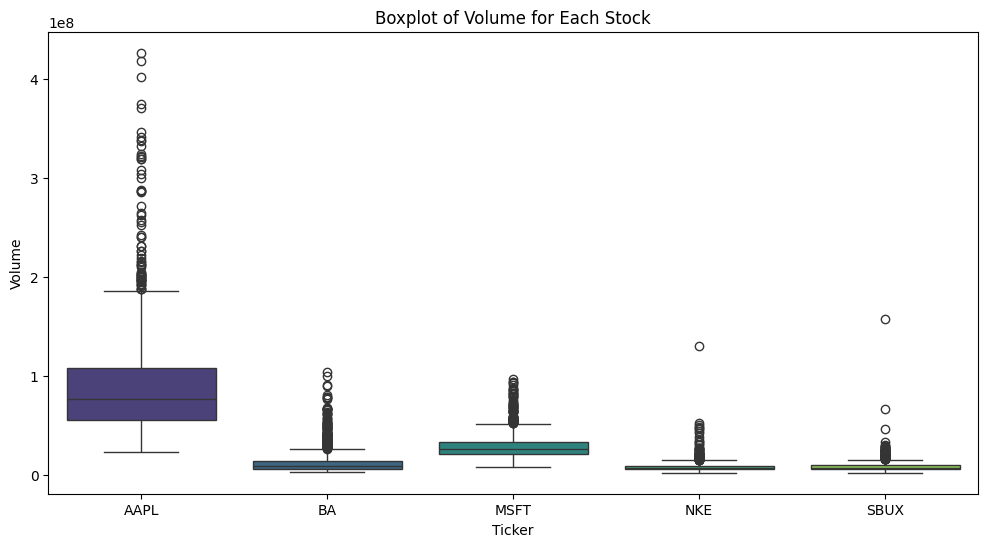

In [64]:
# Volume of each stock
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.boxplot(
    x='Ticker',          # X-axis: stock ticker
    y='Volume',          # Y-axis: trading volume
    data=final_stock_data,
    hue='Ticker',        # color by ticker one box per stock
    dodge=False,         # prevent duplicate boxes
    palette='viridis',
    legend=False         # no need for legend tickers already shown on x-axis
)

plt.title('Boxplot of Volume for Each Stock')
plt.xlabel('Ticker')
plt.ylabel('Volume')
plt.show()

# The Solution: implement a data science solution to the problem you are trying to solve.

**Briefly describe the idea of your solutions to the problem in the following cell (you should use at least 2 methods/models to solve the problem, and compare the performance. Feel free to use any machine learning models or statistical models.):**

In [ ]:
To address the problem of predicting stock price movement, we implemented multiple supervised machine learning models using historical Open, High, Low, Close, Volume features.
The target variable was defined as whether the next day’s adjusted closing price would go Up or Down. We experimented with a range of models, including Logistic Regression, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Naive Bayes, AdaBoost, and Gradient Boosting.
This diverse set of classifiers allowed us to compare both simple linear approaches and more complex ensemble methods.
The models were trained on historical stock data downloaded via yfinance, and their performance was evaluated using metrics such as Accuracy, Precision, Recall, F1-score, Confusion Matrices, and ROC-AUC curves.
This comprehensive evaluation provided insights not only into overall accuracy but also into how well each model balanced false positives and false negatives.
By comparing multiple models side by side, we aimed to identify which techniques are better suited for the inherently noisy and unpredictable task of short-term stock movement prediction.

**Write codes to implement the solution in python:**


=== Logistic Regression ===
Accuracy: 0.5235
              precision    recall  f1-score   support

        Down       0.60      0.09      0.16       618
          Up       0.52      0.94      0.67       639

    accuracy                           0.52      1257
   macro avg       0.56      0.52      0.41      1257
weighted avg       0.56      0.52      0.42      1257



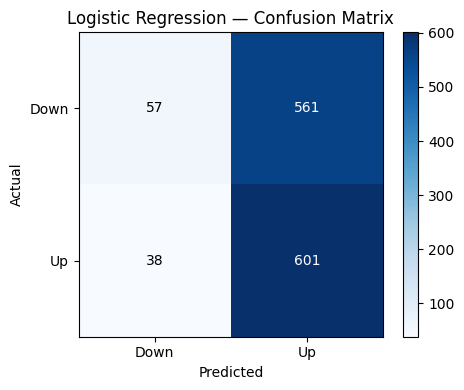

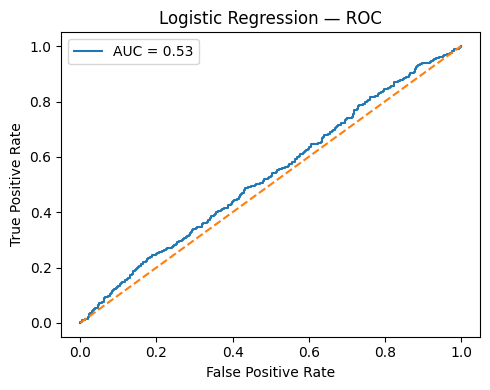


=== Support Vector Machine ===
Accuracy: 0.5131
              precision    recall  f1-score   support

        Down       0.52      0.15      0.23       618
          Up       0.51      0.87      0.64       639

    accuracy                           0.51      1257
   macro avg       0.51      0.51      0.44      1257
weighted avg       0.51      0.51      0.44      1257



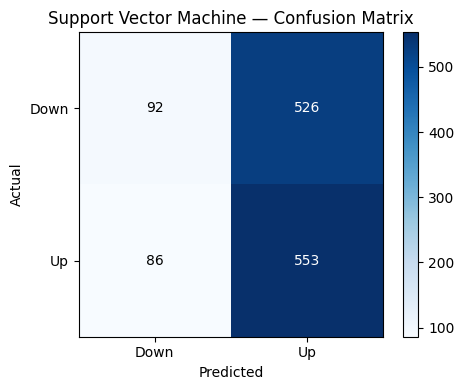

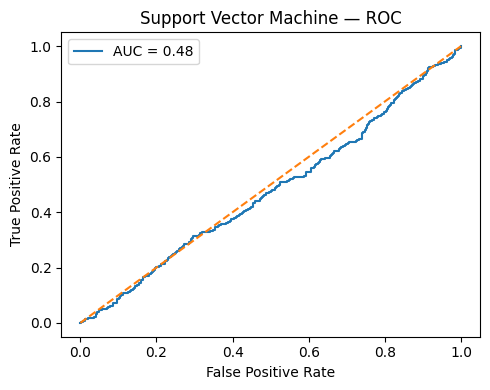


=== K-Nearest Neighbors ===
Accuracy: 0.5099
              precision    recall  f1-score   support

        Down       0.50      0.47      0.48       618
          Up       0.52      0.55      0.53       639

    accuracy                           0.51      1257
   macro avg       0.51      0.51      0.51      1257
weighted avg       0.51      0.51      0.51      1257



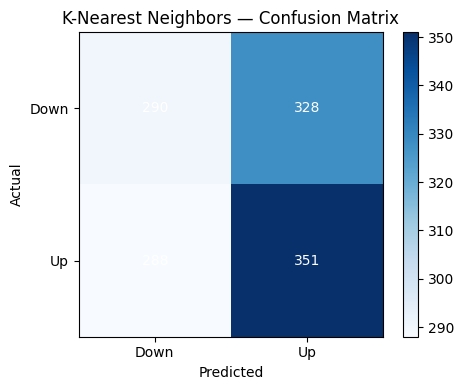

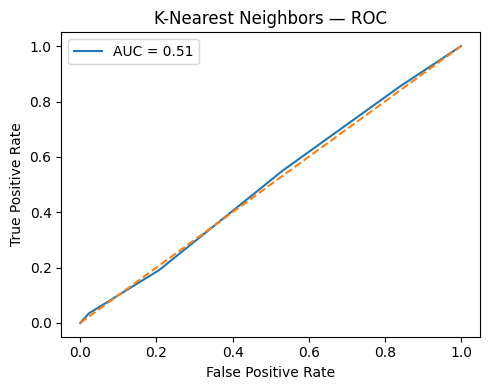


=== Random Forest ===
Accuracy: 0.5139
              precision    recall  f1-score   support

        Down       0.51      0.51      0.51       618
          Up       0.52      0.52      0.52       639

    accuracy                           0.51      1257
   macro avg       0.51      0.51      0.51      1257
weighted avg       0.51      0.51      0.51      1257



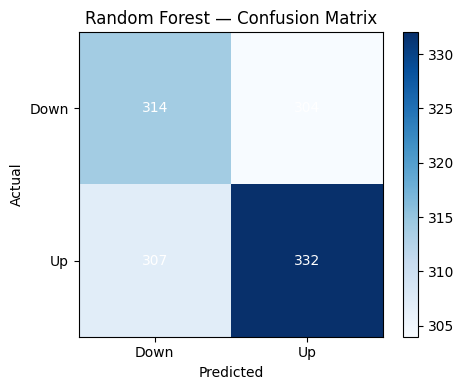

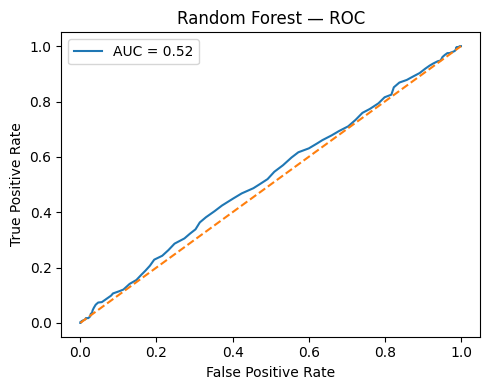


=== Decision Tree ===
Accuracy: 0.5139
              precision    recall  f1-score   support

        Down       0.51      0.50      0.50       618
          Up       0.52      0.53      0.53       639

    accuracy                           0.51      1257
   macro avg       0.51      0.51      0.51      1257
weighted avg       0.51      0.51      0.51      1257



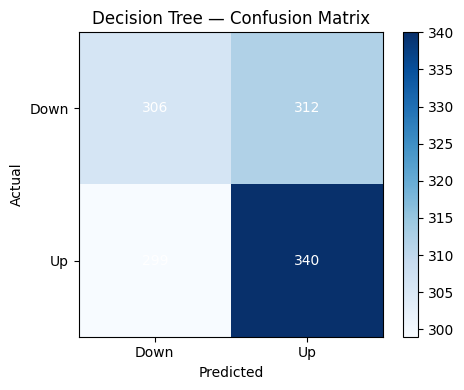

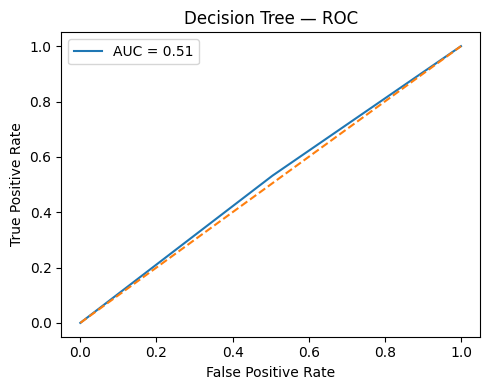


=== Naive Bayes ===
Accuracy: 0.5084
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00       618
          Up       0.51      1.00      0.67       639

    accuracy                           0.51      1257
   macro avg       0.25      0.50      0.34      1257
weighted avg       0.26      0.51      0.34      1257



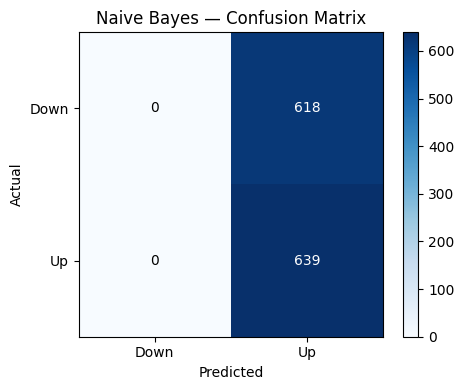

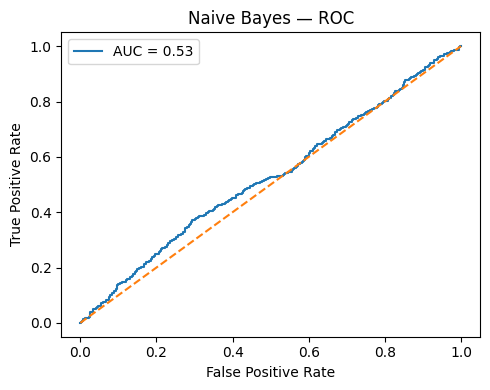


=== AdaBoost ===
Accuracy: 0.5346
              precision    recall  f1-score   support

        Down       0.52      0.65      0.58       618
          Up       0.56      0.42      0.48       639

    accuracy                           0.53      1257
   macro avg       0.54      0.54      0.53      1257
weighted avg       0.54      0.53      0.53      1257



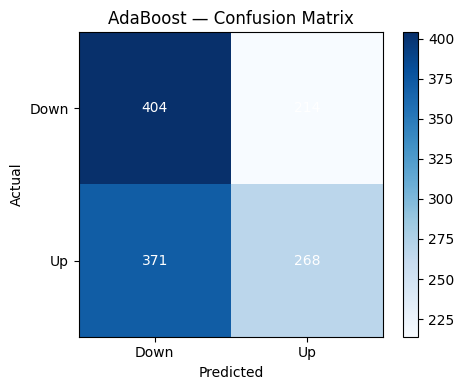

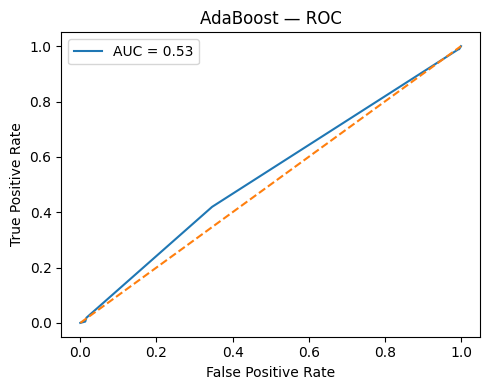


=== Gradient Boosting ===
Accuracy: 0.5131
              precision    recall  f1-score   support

        Down       0.51      0.40      0.45       618
          Up       0.52      0.62      0.56       639

    accuracy                           0.51      1257
   macro avg       0.51      0.51      0.51      1257
weighted avg       0.51      0.51      0.51      1257



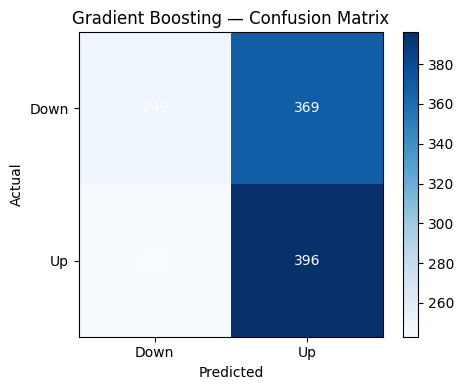

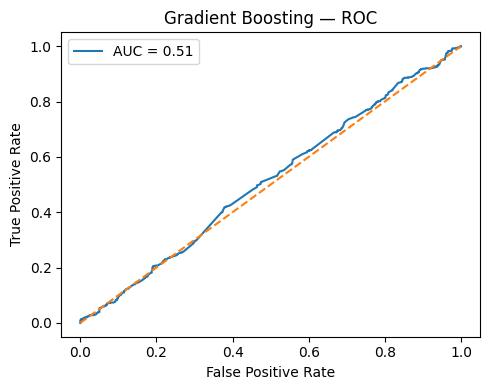


Summary of model performance:
               Classifier  Accuracy  Precision    Recall        F1   ROC_AUC
0                AdaBoost  0.534606   0.556017  0.419405  0.478145  0.534628
1     Logistic Regression  0.523469   0.517212  0.940532  0.667407  0.532388
2           Decision Tree  0.513922   0.521472  0.532081  0.526723  0.513614
3           Random Forest  0.513922   0.522013  0.519562  0.520784  0.524449
4       Gradient Boosting  0.513126   0.517647  0.619718  0.564103  0.512577
5  Support Vector Machine  0.513126   0.512512  0.865415  0.643772  0.478359
6     K-Nearest Neighbors  0.509944   0.516937  0.549296  0.532625  0.506414
7             Naive Bayes  0.508353   0.508353  1.000000  0.674051  0.525703


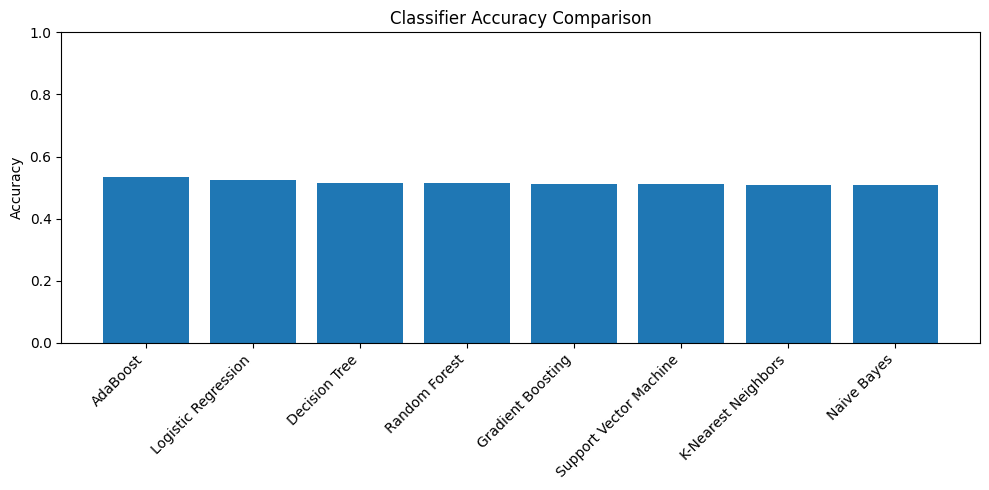


Best model: AdaBoost | Accuracy=0.5346, Precision=0.5560, Recall=0.4194, F1=0.4781, ROC_AUC=0.5346275784878274


In [65]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# The Solution: Stock Price Movement

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_fscore_support, roc_auc_score
)

# Helper plots (confusion matrix + ROC)
def plot_confusion_matrix(cm, title, classes=('Down','Up')):
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes)
    plt.yticks(ticks, classes)
    thr = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center",
                     color="white" if cm[i, j] > thr else "black")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

def plot_roc(y_true, y_scores, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Target: next-day direction per ticker (Adj Close)
next_adj_close = final_stock_data.groupby('Ticker')['Adj Close'].shift(-1)
final_stock_data['Price_Up'] = (next_adj_close > final_stock_data['Adj Close']).astype(int)

# Keep only rows where the next day exists (avoid label noise on last row per ticker)
mask = next_adj_close.notna()
data_ml = final_stock_data.loc[mask].copy()

# Features / target
features = ['Close', 'Open', 'High', 'Low', 'Volume']  # simple OHLCV set
X = data_ml[features]
y = data_ml['Price_Up']

# Train/test split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Models (scale for LR/SVC/KNN)
classifiers = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    'Support Vector Machine': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC(probability=True))
    ]),
    'K-Nearest Neighbors': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', KNeighborsClassifier())
    ]),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

# Train, evaluate, and collect metrics
rows = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)

    acc = accuracy_score(y_test, preds)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_test, preds, average='binary', zero_division=0
    )

    # Get scores for ROC/AUC
    scores = None
    if hasattr(clf, "predict_proba"):
        scores = clf.predict_proba(X_test)[:, 1]
    elif hasattr(clf, "decision_function"):
        scores = clf.decision_function(X_test)

    auc_val = np.nan
    if scores is not None:
        try:
            auc_val = roc_auc_score(y_test, scores)
        except ValueError:
            pass

    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    # zero_division=0 prevents UndefinedMetricWarning when a class gets zero predictions
    print(classification_report(y_test, preds, target_names=['Down','Up'], zero_division=0))

    cm = confusion_matrix(y_test, preds)
    plot_confusion_matrix(cm, f'{name} — Confusion Matrix')

    if scores is not None:
        plot_roc(y_test, scores, title=f"{name} — ROC")

    rows.append({
        "Classifier": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC_AUC": auc_val
    })

# Summary table + accuracy bar chart
results_df = pd.DataFrame(rows).sort_values("Accuracy", ascending=False).reset_index(drop=True)
print("\nSummary of model performance:")
print(results_df)

# Accuracy comparison bar chart
plt.figure(figsize=(10, 5))
plt.bar(results_df["Classifier"], results_df["Accuracy"])
plt.title("Classifier Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Best model line
best_row = results_df.iloc[0]
print(
    f"\nBest model: {best_row['Classifier']} | "
    f"Accuracy={best_row['Accuracy']:.4f}, "
    f"Precision={best_row['Precision']:.4f}, "
    f"Recall={best_row['Recall']:.4f}, "
    f"F1={best_row['F1']:.4f}, "
    f"ROC_AUC={best_row['ROC_AUC'] if not np.isnan(best_row['ROC_AUC']) else 'N/A'}"
)

# Results: summarize and visualize the results discovered from the analysis

**Summarize the results of different models. Compare the perfomance and explain it. Please use figures or tables to present the results.**


In [ ]:
1) Trained eight classifiers: Logistic Regression, SVM, KNN, Decision Tree, Random Forest, Naive Bayes, AdaBoost, Gradient Boosting.
2) Models aimed to predict whether the next day's adjusted close would be Up or Down using Open, High, Low, Close, Volume features.
3) Test accuracy across models stayed between 51–54%, with ROC-AUC ≈ 0.50–0.53, close to random guessing.
4) Best performer was AdaBoost with ~53.5% accuracy and ROC-AUC ~0.53.
5) Ensemble methods (Random Forest, AdaBoost, Gradient Boosting) performed slightly better than linear models, but still modest overall.
6) Prediction of daily direction is difficult because raw OHLCV data is noisy.
7) Confusion matrices revealed a mild bias toward predicting “Up,” consistent with market upward drift and class imbalance.
8) ROC curves were close to the diagonal, showing limited discriminative power.
9) Short-horizon stock direction prediction is hard; results align with the efficient market hypothesis.
10) To improve performance: add engineered features (technical indicators such as moving averages, RSI, MACD, volatility), rebalance classes, or predict longer horizons (weekly or monthly instead of daily).

Conclusion:
This showed that predicting short-term stock price direction using only OHLCV data is highly challenging.
Across eight classifiers, accuracy remained close to random guessing (~51–54%) with ROC-AUC values near 0.50.
Among the models, AdaBoost performed slightly better (~53.5% accuracy, ROC-AUC ~0.53), while ensemble methods overall proved more stable than simpler models.
However, the modest improvements highlight the noisy nature of daily stock movements and support the efficient market hypothesis.
Future improvements could come from incorporating technical indicators, sentiment or macroeconomic data, and experimenting with longer horizons such as weekly or monthly predictions.

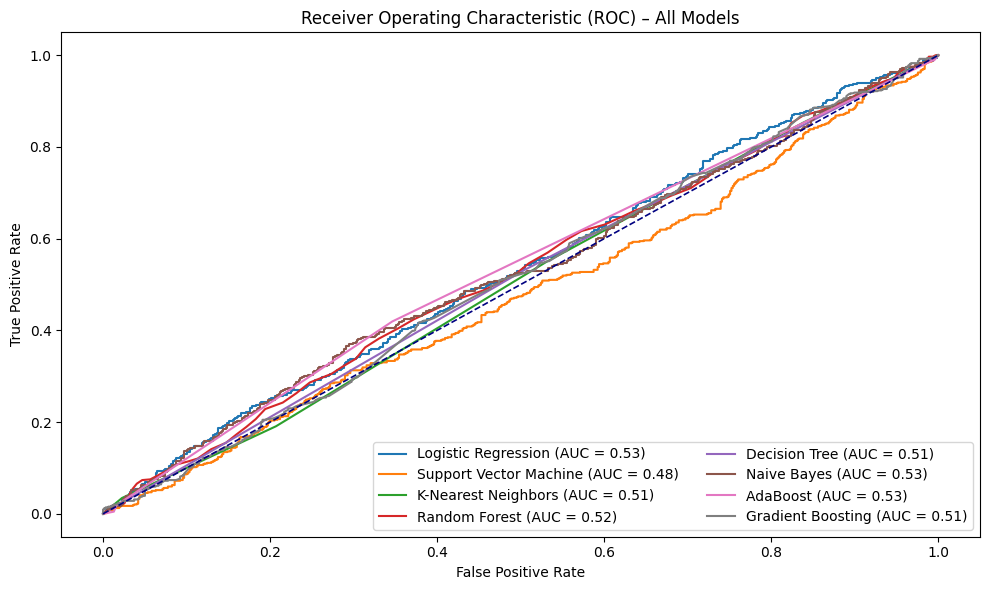

Best model: AdaBoost | Accuracy=0.535 | ROC_AUC=0.535


In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Multi-model ROC (combined plot)
plt.figure(figsize=(10, 6))

# Loop through classifiers and get predicted scores
for name, clf in classifiers.items():
    if hasattr(clf, "predict_proba"):
        scores = clf.predict_proba(X_test)[:, 1]
    elif hasattr(clf, "decision_function"):
        scores = clf.decision_function(X_test)
    else:
        continue

    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1.5, label=f"{name} (AUC = {roc_auc:.2f})")

# Diagonal baseline
plt.plot([0, 1], [0, 1], color="navy", lw=1.2, linestyle="--")

# Formatting
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) – All Models")
plt.legend(loc="lower right", ncol=2)
plt.tight_layout()
plt.show()

# Print the best model info
best = results_df.sort_values("Accuracy", ascending=False).iloc[0]
best_model_name = best["Classifier"]
best_acc = best["Accuracy"]
best_auc = np.nan if pd.isna(best["ROC_AUC"]) else best["ROC_AUC"]

print(
    f"Best model: {best_model_name} | "
    f"Accuracy={best_acc:.3f} | "
    f"ROC_AUC={'N/A' if pd.isna(best_auc) else f'{best_auc:.3f}'}"
)